# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [153]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd

import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [154]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [155]:
import hvplot.pandas

In [156]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [157]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [159]:
# Getting the data of the dwelling types 

dwelling_types = [
    "single_detached_house",
    "apartment_five_storeys_plus",
    "movable_dwelling",
    "semi_detached_house",
    "row_house",
    "duplex",
    "apartment_five_storeys_less",
    "other_house"
]

df_dwelling_units = to_data[dwelling_types].groupby(to_data.index).sum()



,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [ ]:
# Getting the data from the owned and rented sections 

df_avg_costs = (to_data[["shelter_costs_owned", "shelter_costs_rented"]]
               .groupby(to_data.index).mean())

# Getting the average house data value per year 

df_avg_value = (to_data[["average_house_value"]]
               .groupby(to_data.index).mean())



# getting the mean number of dwelling types units per year

df_dwelling_units = to_data[dwelling_types].groupby(to_data.index).sum()

#this lists each suburb and the varioius years and provides data on average house value 
df_average_value = to_data[["neighbourhood","average_house_value"]]
df_average_value = df_average_value.reset_index()

#getting the number of dwelling types per year 
df_number_dwellings = to_data.reset_index()

# Getting the data from the top 10 expensive neighbourhoods
df_expensive_neighbourhoods = to_data.groupby(by="neighbourhood").mean()
df_expensive_neighbourhoods = df_expensive_neighbourhoods.sort_values(
    by="average_house_value", ascending=False
).head(10)
df_expensive_neighbourhoods = df_expensive_neighbourhoods.reset_index()

# Getting the mean values for each neighbourhood
mean_data = to_data[['neighbourhood', 'average_house_value']].groupby('neighbourhood').sum()/4
mean_data = mean_data.sort_values('average_house_value', ascending=False).reset_index()

# getting the concatentated suburbs via neighbourhood and coordinates 

suburbs = pd.concat([mean_data,df_neighbourhood_locations], join = 'inner', axis ='columns')



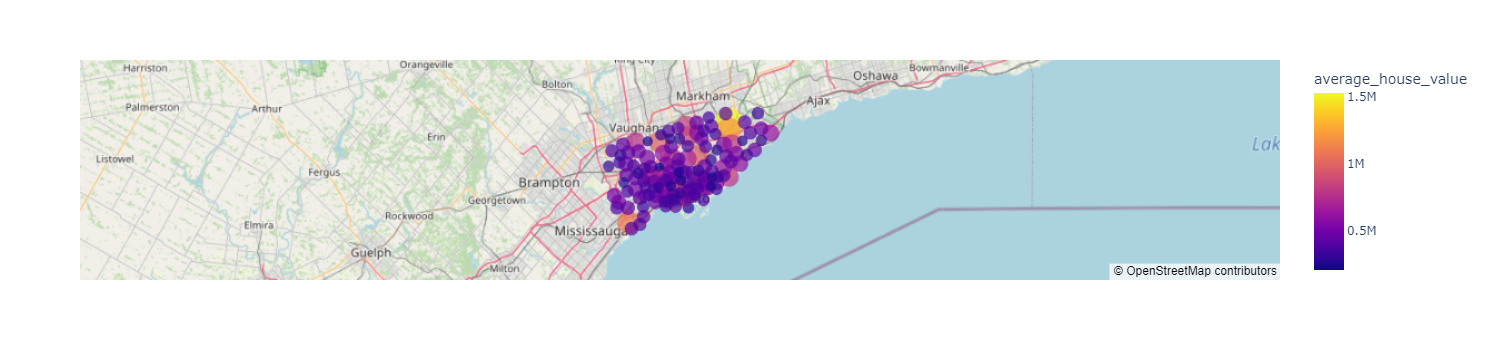

In [137]:
# Define Panel visualization functions
def neighbourhood_map():
 
    map_plot = px.scatter_mapbox(
        suburbs,
        lat='lat',
        lon='lon',
        size='average_house_value',
        color = 'average_house_value'
    )

    map_plot.update_layout(mapbox_style='open-street-map')
    return map_plot
neighbourhood_map() 

In [113]:

def create_line_chart(data, title, xlabel, ylabel, color):
    """
    
    Create a line chart based in the data argument.
    """
    
    fig = plt.figure()
    line_chart = data.plot(color=color)
    line_chart.set_xlabel(xlabel)
    line_chart.set_ylabel(ylabel)
    line_chart.set_title(title)
    plt.close(fig) 


In [ ]:
owner_costs = create_line_chart(df_avg_costs["shelter_costs_owned"],"Average Monthly Shelter cost for Owned Dwellings in Toronto","Year","Avg Monthly Shelter Costs","blue")
renter_costs = create_line_chart(df_avg_costs["shelter_costs_rented"],"Average Monthly Shelter cost for Rented Dwellings in Toronto","Year","Avg Monthly Shelter Costs","yellow")



In [147]:
#build a row of costs owner vs renter 
row_of_costs = pn.Row(owner_costs)
row_of_costs.append(renter_costs)
row_of_costs

NameError: name 'owner_costs' is not defined

In [114]:
def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    
df_average_value = to_data[["neighbourhood","average_house_value"]]
df_average_value = df_average_value.reset_index()

df_average_value.head(10)


,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864
5,2001,Bathurst Manor,304749
6,2001,Bay Street Corridor,257404
7,2001,Bayview Village,327644
8,2001,Bayview Woods-Steeles,343535
9,2001,Bedford Park-Nortown,565304


### Panel Visualization Functions

In [117]:
    

def number_dwelling_types():
    """Number of dwelling types per year"""
    
df_number_dwellings = to_data.reset_index()
df_number_dwellings.head(10)



,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
5,2001,Bathurst Manor,2405,1550,0,130,130,375,745,0,304749,843,1052
6,2001,Bay Street Corridor,10,7575,0,0,15,0,240,0,257404,1218,1142
7,2001,Bayview Village,2170,630,0,170,765,15,640,0,327644,1197,1164
8,2001,Bayview Woods-Steeles,1650,1715,0,925,105,10,170,5,343535,1212,1018
9,2001,Bedford Park-Nortown,4985,2080,0,45,40,210,1235,15,565304,933,1491


In [148]:

def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    df_avg_value = (to_data[["average_house_value"]]
               .groupby(to_data.index).mean())
    df_avg_value



In [149]:
def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    df_expensive_neighbourhoods = to_data.groupby(by="neighbourhood").mean()
    df_expensive_neighbourhoods = df_expensive_neighbourhoods.sort_values(by="average_house_value",ascending=False).head(10)
    df_expensive_neighbourhoods.reset_index(inplace=True)
    df_expensive_neighbourhoods



## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [160]:
# Create a Title for the Dashboard
#create panels to structure the layout of the dashboard

# Define a welcome text
print("We are viewing data on Toronto dwellings for the years 2001 2006 2011 and 2016 by number, type, cost, values and also the most expensive suburbs") 


#compare costs of housing vs values first 
costvalue_row = pn.Row(df_dwelling_units(10), df_avg_costs, df_avg_value)
costvalue_row



We are viewing data on Toronto dwellings for the years 2001 2006 2011 and 2016 by number, type, cost, values and also the most expensive suburbs


TypeError: 'DataFrame' object is not callable

In [ ]:
#create columns to compare total Toronto data with most expensive data

compare_column = pn.Column(pn.pane.Markdown("## Total Toronto data vs Expensive Suburbs", style={'color':'grey','font-family':'san-serif'}))
    '## Toronto totals', 
    '## Most Expensive suburbs',
     df_average_value,
     df_expensive_neighbourhoods)
    
compare_column

# Create a tab layout for the dashboard
to_dashboard = pn.Tabs(
    (
     "Toronto totals",
      df_average_value
    ),
    ("Most Expensive suburbs",
     df_average_value.hvplot.line
    )
)
to_dashboard

# Create the main dashboard
overall_dashboard = pn.Tabs(
    ( 
        "Costs",
        df_avg_costs
    ),
    (   "Values",
        df_avg_value
    ),
    (
        "Toronto totals",
        df_average_value
    ),
    (   "Most Expensive suburbs",
        df_expensive_neigbourhoods
    ),
    (   "Map of Toronto dwellings", 
         map_plot
    )
)
overall_dashboard

## Serve the Panel Dashboard

In [69]:
pn.serve(overall_dashboard)
dashboard.servable()

NameError: name 'overall_dashboard' is not defined

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [70]:
#neighbourhood_map().show()

In [ ]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# Bar chart for 2001
create_bar_chart(df_dwelling_units.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# Bar chart for 2006
create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# Bar chart for 2011
create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# Bar chart for 2016
create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [ ]:
create_line_chart(data, title, xlabel, ylabel, color)

# Line chart for owned dwellings
create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# Line chart for rented dwellings
create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [ ]:
# average_house_value()

In [ ]:
# average_value_by_neighbourhood()

In [ ]:
# number_dwelling_types()

In [ ]:
# average_house_value_snapshot()

In [ ]:
# top_most_expensive_neighbourhoods()

In [ ]:
# sunburts_cost_analysis()